In [1]:
class MeraLR:

    def __init__(self):
        self.m = None
        self.b = None

    def fit(self,X_train,y_train):

        num = 0
        den = 0

        for i in range(X_train.shape[0]):

            num = num + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))

        self.m = num/den
        self.b = y_train.mean() - (self.m * X_train.mean())
        print(self.m)
        print(self.b)

    def predict(self,X_test):

        print(X_test)

        return self.m * X_test + self.b

In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('placement.csv')

In [5]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


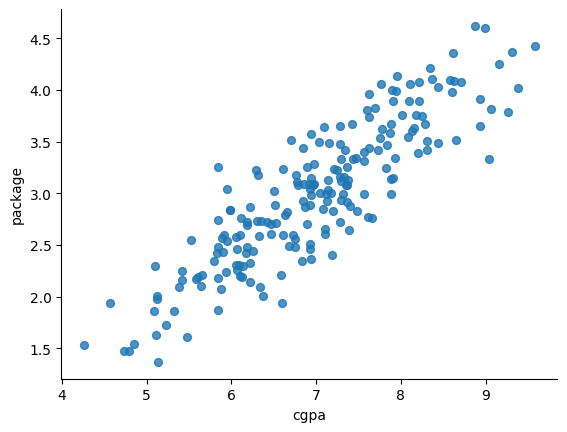

In [6]:
# @title cgpa vs package

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='cgpa', y='package', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:

X = df.iloc[:,0].values
y = df.iloc[:,1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [13]:
X_train.shape

(160,)

In [7]:
lr = MeraLR()

In [8]:
X_train = df['cgpa'].values
y_train = df['package'].values

In [9]:
lr.fit(X_train, y_train)

0.5695912947937534
-0.9856779462557332


In [10]:
lr.predict(7.8)

7.8


np.float64(3.4571341531355433)

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

[8.58 7.15 5.88 6.22 4.57 4.79 5.32 6.86 8.35 6.87 8.94 7.9  6.93 5.91
 7.32 7.82 5.09 7.42 6.94 7.73 6.19 7.28 6.73 7.2  8.21 6.75 7.87 7.6
 8.63 5.12 8.15 7.36 8.31 6.6  6.59 7.47 7.93 6.29 6.37 6.47]
Mean Squared Error: 0.11930145368750504
R-squared: 0.7843292550953309
